In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/gaussFit_spec2D.py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_info = gen_dataInfo_from_tfCube()

half_light_radius : 0.5
vcirc : 200.0
sini : 1.0
slitWidth : 0.02


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.664764165878296 (sec)
total getSlitSpectra time: 1.1738710403442383 (sec)


In [3]:
lambda0 = 656.461
redshift = 0.2

In [4]:
fit_tool = gaussFit_spec2D(data_info,lambda0,redshift)

In [5]:
v_min = np.min(fit_tool.grid_lambda)  ; v_MAX = np.max(fit_tool.grid_lambda)
x_min = np.min(fit_tool.grid_pos)     ; x_MAX = np.max(fit_tool.grid_pos)

In [6]:
peak_info = get_peak_info(data=fit_tool.data,grid_spec=fit_tool.grid_lambda)

In [7]:
fitted_peakLoc,fitted_amp,fitted_sigma = fit_tool.fit_spec2D(data=fit_tool.data,grid_spec=fit_tool.grid_lambda)

time cost: 0.218048095703125 (secs)


In [8]:
model = fit_tool.gen_model_spec2D(fitted_peakLoc,fitted_amp,fitted_sigma,grid_spec=fit_tool.grid_lambda)

In [9]:
data = fit_tool.data

In [10]:
peak_V = lambda_to_velocity(fit_tool.lambda0,fitted_peakLoc)

In [11]:
params_rot = fit_tool.approxFit_rotation_curve(peak_lambda=fitted_peakLoc)

In [13]:
params_rot

{'r_0': -0.00800060165697787,
 'r_t': 0.49809679644454347,
 'v_0': 59958.50589741825,
 'v_a': 240.00372990687256}

In [14]:
v_0_fid = velocity_system(redshift)
fid_rot_v_peak      = arctan_rotation(fit_tool.grid_pos,r_0=0.0, r_t=0.5, v_0=v_0_fid, v_a=200.)
fid_rot_lambda_peak = velocity_to_lambda(fit_tool.lambda0,fid_rot_v_peak)

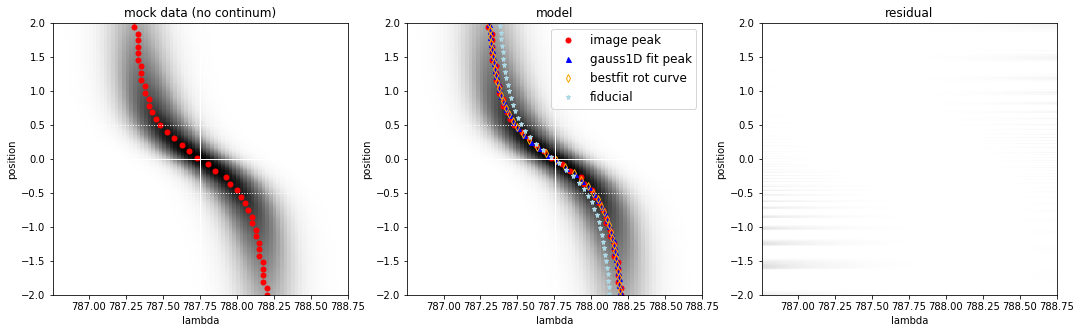

In [15]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
#ax[0].imshow(np.sum(modelGrid,axis=2))
ax[0].imshow(data ,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data-model)/data,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)

ax[0].plot(peak_info['peak_loc'][::6]         ,np.flip(fit_tool.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')

ax[1].plot(peak_info['peak_loc'][::6]         ,np.flip(fit_tool.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak')
ax[1].plot(fitted_peakLoc[3::6]               ,np.flip(fit_tool.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none',label='gauss1D fit peak')
ax[1].plot(fit_tool.approxFit_rot_lambda_peak[2::6],np.flip(fit_tool.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot curve')
ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(fit_tool.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')


#ax[2].plot(peak_info['peak_loc'][::6],np.flip(fit_tool.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(fit_tool.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(fit_tool.approxFit_rot_lambda_peak[2::6],np.flip(fit_tool.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(fit_tool.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')


vcen = lambda0*(1.+redshift)

for j in range(ncol):
    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    #ax[j].axvline(x=vcen+100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen+200,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-200,color='white', linestyle=':',lw=1)
    
    ax[j].set_xlim(vcen-1.0,vcen+1.0)
    ax[j].set_ylim(-2,2)
    ax[j].set_xlabel('lambda')
    ax[j].set_ylabel('position')
    
ax[0].set_title('mock data (no continum)')
ax[1].set_title('model')
ax[2].set_title('residual')

ax[1].legend(loc='best',prop={'size':12})

plt.show()

In [16]:
fit_lambda_peak_max = fit_tool.approxFit_rot_lambda_peak[-1]
fit_lambda_peak_max

788.1986493306898

In [17]:
v_relative = lambda_to_velocity(lambda0,lambda_obs=fit_lambda_peak_max,norm=1,redshift=redshift)
v_relative

203.42769755087647

In [18]:
v_sys0 = velocity_system(redshift)

In [19]:
lambda_image_peak    = peak_info['peak_loc']
lambda_gaussfit_peak = fitted_peakLoc

v_image_peak = lambda_to_velocity(lambda0,lambda_obs=lambda_image_peak,norm=1,redshift=redshift)
v_gaussfit_peak = lambda_to_velocity(lambda0,lambda_obs=lambda_gaussfit_peak,norm=1,redshift=redshift)

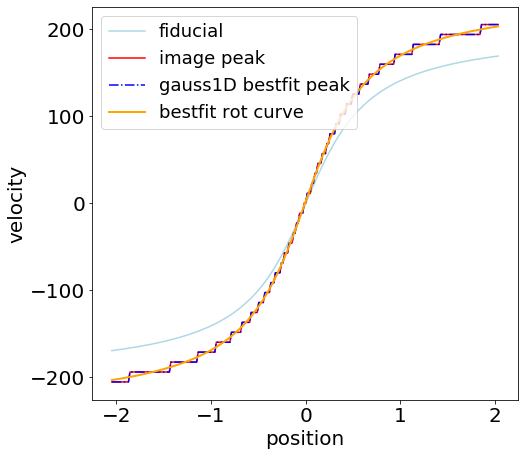

In [20]:
fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.11,0.82,0.84])

ax1.plot(fit_tool.grid_pos,fid_rot_v_peak-v_sys0,label='fiducial',color='lightblue')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='image peak',color='red')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='gauss1D bestfit peak',color='blue',ls="-.")
ax1.plot(fit_tool.grid_pos,fit_tool.approxFit_rot_v_peak-v_sys0,label='bestfit rot curve',color='orange',lw=2)


ax1.set_xlabel('position')
ax1.set_ylabel('velocity')

ax1.legend(loc='best',prop={'size':18})